In [1]:
# importing the necessary librariesd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data frame in python
df = pd.read_csv(r'C:\Users\perei\OneDrive\Desktop\Datasets-20211109\Add_sales_data_2018.csv')

In [3]:
# displaying the data frame
df.head()


,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
# getting the number of rows and columns 
df.shape

(205, 7)

In [5]:
# creating a new data frame without dates, as dates do not have any effect on profits
df1 = df.drop(['Date'],axis=1)

In [6]:
# displaying the new data frame
df1. head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683


# 1. Finding the correlation

In [7]:
# Finding the correlation btw different columns and storing it to a variable
corrmatrix = df1.corr()

In [8]:
# displaying the results in table form
corrmatrix

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

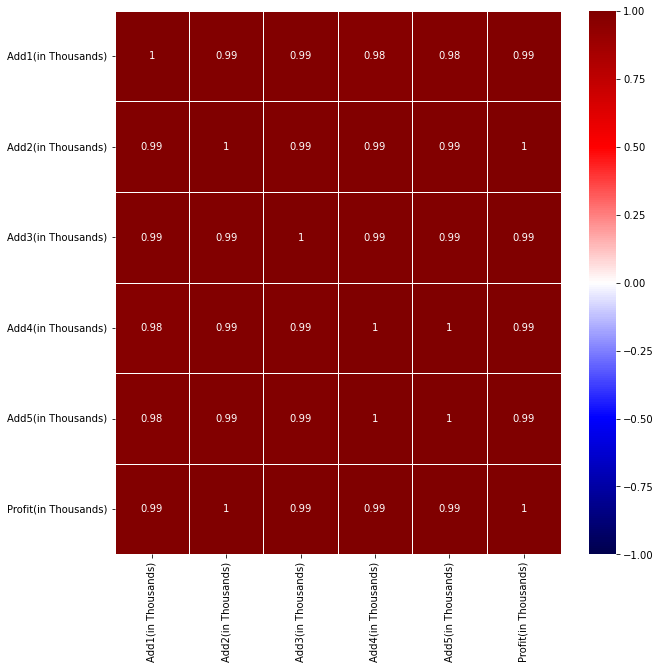

In [9]:
# visualising the correlation as heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corrmatrix,vmin = -1,vmax = 1,annot = True,cmap = 'seismic',linewidth = .5)

# 2. Building a Regression model

# a) Splitting the data

In [10]:
# importibg model selection from scikit learn and splitting the data set into training and testing set
from sklearn.model_selection import train_test_split
y = df1['Profit(in Thousands)']
X = df1.drop(['Profit(in Thousands)'],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.20)

In [11]:
# displaying the shape of y
y.shape


(205,)

In [12]:
# displaying the shape of X
X.shape

(205, 5)

# b) Creating a model 

In [13]:
# importing the library for linear regression
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [34]:
model = lr.fit(X_train,y_train)

# c) Using the model to predict values

In [15]:
# predicting the values for X_test and storing it in prediction variable
prediction = model.predict(X_test)

In [16]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64


In [17]:
# displaying the values predicted by the model
print(prediction)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788]


# d) Evaluating the prediction

In [18]:
# importing mean squared error from scikit learn
from sklearn.metrics import mean_squared_error

In [19]:
# displaying the mean squared error
print('MSE between the predicted and original values is ',mean_squared_error(y_test,prediction))

MSE between the predicted and original values is  3.429773271561334e-25


In [20]:
 from sklearn.metrics import mean_absolute_error

In [21]:
print('MAE between predicted and original values is ',mean_absolute_error(y_test,prediction))

MAE between predicted and original values is  3.7710755927170193e-13


# prediction after removing one of the columns other than date 

In [22]:
# importibg model selection from scikit learn and splitting the data set into training and testing set
from sklearn.model_selection import train_test_split
z = df1.drop(['Profit(in Thousands)','Add4(in Thousands)' ],axis = 1)
z_train,z_test,y_train,y_test = train_test_split(z,y,random_state=42,test_size=.20)

In [23]:
# creating a model
model_1 = lr.fit(z_train,y_train)

In [24]:
# predicting the values
prediction_1 = model_1.predict(z_test)

In [25]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
Name: Profit(in Thousands), dtype: float64


In [26]:
print(prediction_1)

[4153.27545349 4445.73004619 5130.52882637 4906.51003111 5006.83829552
 4623.3730661  5384.61181823 5328.12178883 5174.25834283 5956.19250176
 5780.69521274 4998.64258624 5075.7581675  5783.18604238 4936.51119211
 5065.32351051 4190.86616915 5034.92724764 5013.76045633 5134.50334278
 5145.26772667 5422.50254931 4569.03526175 4597.94049005 4436.70490492
 4175.24282289 5616.25454411 5667.28466418 4648.94589473 5717.8495839
 5000.54215905 5182.27940317 5017.71485201 5545.29847919 5013.73982034
 5033.29657638 5108.67989299 4760.08423647 4604.89118199 4925.5997048
 5252.38632566]


In [27]:
# displaying the mean squared error
print('MSE between the predicted and original values is ',mean_squared_error(y_test,prediction_1))

MSE between the predicted and original values is  0.8506975615641429


In [28]:
# i have splitted the data in two ways:
#          a) data with only date column removed
#          b) data with both date and add4 columns removed
# The result of 'a' shows only small mean squared error when compared to that of 'b'. That is 'a' has a value of MSE as3.429773271561334e-25
# while 'b' has MSE value of  0.8506975615641429. So it can be concluded that model of 'a' is more accurate than that of 'b'

# 3. Predicting the profit generated by the company  by giving the values given in the question

In [35]:
# giving input values and predicting the profit
values = [[290,312,309,298,320]]
prediction_2 = model.predict(values)

C:\Users\perei\anaconda3\envs\new1\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
print('The profit according to inputs is',prediction_2)

The profit according to inputs is [5820.06]
